**Environment Setup and Data Acquisition**

To initiate the epidemiological analysis, the necessary software environment must be established. This process involves installing the nhanes Python package, which facilitates direct access to the National Health and Nutrition Examination Survey data. Subsequently, the relevant libraries are imported, and the dataset corresponding to the 2017-2018 cycle is loaded into memory. Finally, a preliminary inspection of the variables is conducted to verify the correct loading of the data structure.

In [3]:
# 1. Install the NHANES library
# (This step is required each time a new session is started in the cloud environment)
# Do this every time!
!pip install nhanes

# 2. Import necessary libraries for data manipulation
import pandas as pd
from nhanes.load import load_NHANES_data

# 3. Load the NHANES dataset for the 2017-2018 cycle
df = load_NHANES_data(year='2017-2018')

# 4. Verify the operation
print("✅ Environment setup complete.")
print(f"Dataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns.")

# 5. Inspect the first few column names to confirm variable naming conventions
# (This ensures we use the correct names like 'Gender' instead of 'RIAGENDR')
print("Sample of available variables:", list(df.columns[:10]))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.4 MB/s eta 0:00:00
✅ Environment setup complete.
Dataset loaded successfully with 8366 rows and 197 columns.
Sample of available variables: ['GeneralHealthCondition', 'EverBreastfedOrFedBreastmilk', 'AgeStoppedBreastfeedingdays', 'AgeFirstFedFormuladays', 'AgeStoppedReceivingFormuladays', 'AgeStartedOtherFoodbeverage', 'AgeFirstFedMilkdays', 'TypeOfMilkFirstFedWholeMilk', 'TypeOfMilkFirstFed2Milk', 'TypeOfMilkFirstFed1Milk']


In [7]:
# Facciamo cercare a Python come ha chiamato le colonne
cols = list(df.columns)

print("1. Nomi che sembrano Età:")
print([c for c in cols if "Age" in c])

print("\n2. Nomi che sembrano Sesso:")
print([c for c in cols if "Gender" in c])

print("\n3. Nomi che sembrano BMI:")
print([c for c in cols if "BMI" in c])

1. Nomi che sembrano Età:
['AgeStoppedBreastfeedingdays', 'AgeFirstFedFormuladays', 'AgeStoppedReceivingFormuladays', 'AgeStartedOtherFoodbeverage', 'AgeFirstFedMilkdays', 'HowOftenDrankMilkAge512', 'HowOftenDrankMilkAge1317', 'HowOftenDrankMilkAge1835', 'AgeWhenToldYouHadHeartAttack', 'AgeWhenToldYouHadAStroke', 'Age1StCancerMcq230ADiagnosed', 'AgeInYearsAtScreening', 'AgeInMonthsAtScreening0To24Mos', 'AgeWhenFirstToldYouHadDiabetes', 'AgeStartedSmokingCigarettesRegularly']

2. Nomi che sembrano Sesso:
['Gender']

3. Nomi che sembrano BMI:
[]


In [9]:
# Cerchiamo come hanno nascosto il BMI
cols = list(df.columns)

print("Variabili che contengono la parola 'Body':")
print([c for c in cols if "Body" in c])

Variabili che contengono la parola 'Body':
['BodyMassIndexKgm2']


**Variable Selection and Data Standardization**
Following the data inspection, we proceed to extract the specific variables required for the obesity analysis. We select Gender, Age at Screening (AgeInYearsAtScreening), and Body Mass Index (BodyMassIndexKgm2). To facilitate the analysis, these variables are renamed to standard English terms. Subsequently, observations with missing BMI data are removed to ensure the validity of the sample, and a binary indicator for obesity is generated based on the clinical threshold (BMI $\ge$ 30).

In [10]:
# 1. Select the exact variables we found in the dataset
df_clean = df[['Gender', 'AgeInYearsAtScreening', 'BodyMassIndexKgm2']].copy()

# 2. Rename columns to simple English for clarity
df_clean = df_clean.rename(columns={
    'AgeInYearsAtScreening': 'Age',
    'BodyMassIndexKgm2': 'BMI'
})

# 3. Data Cleaning: Remove rows where BMI is missing
df_clean = df_clean.dropna(subset=['BMI'])

# 4. Define Health Event: Obesity (BMI >= 30)
df_clean['is_obese'] = df_clean['BMI'] >= 30

# 5. Verification
print("✅ Step 2 Complete: Data cleaned and variables standardized.")
print(f"Valid participants: {len(df_clean)}")
print(df_clean.head())

✅ Step 2 Complete: Data cleaned and variables standardized.
Valid participants: 8005
         Gender   Age   BMI  is_obese
SEQN                                 
93703.0  Female   2.0  17.5     False
93704.0    Male   2.0  15.7     False
93705.0  Female  66.0  31.7      True
93706.0    Male  18.0  21.5     False
93707.0    Male  13.0  18.1     False


**Epidemiological Analysis and Prevalence Calculation**

In the final phase, we perform descriptive statistical analysis to quantify the burden of obesity within the study population. We calculate the absolute frequency of cases and the crude prevalence rate (percentage of the total population). Furthermore, we stratify the analysis by gender to derive specific prevalence rates, enabling a direct comparison of obesity burden between male and female subpopulations.

In [11]:
# 1. Absolute Frequency: Count total obesity cases
# We sum the 'True' values in the is_obese column
num_cases = df_clean['is_obese'].sum()

# 2. Crude Prevalence: Calculate percentage of total population
# Formula: (Cases / Total Population) * 100
prevalence_total = (num_cases / len(df_clean)) * 100

# 3. Specific Prevalence Rates (Stratified by Gender)
# We separate the dataset into Males and Females based on the 'Gender' column
males = df_clean[df_clean['Gender'] == 'Male']
females = df_clean[df_clean['Gender'] == 'Female']

# Calculate prevalence specifically for each group
# We use .shape[0] to get the total count of people in that group
male_prev = (males['is_obese'].sum() / males.shape[0]) * 100
female_prev = (females['is_obese'].sum() / females.shape[0]) * 100

# 4. Print Final Epidemiological Report
print("📊 FINAL EPIDEMIOLOGICAL REPORT (NHANES 2017-2018)")
print("-" * 50)
print(f"Total Participants Analyzed: {len(df_clean)}")
print(f"Total Obesity Cases:         {num_cases}")
print(f"Overall Prevalence:          {prevalence_total:.2f}%")
print("-" * 50)
print("SPECIFIC RATES BY GENDER:")
print(f"Prevalence in MEN:           {male_prev:.2f}%")
print(f"Prevalence in WOMEN:         {female_prev:.2f}%")

📊 FINAL EPIDEMIOLOGICAL REPORT (NHANES 2017-2018)
--------------------------------------------------
Total Participants Analyzed: 8005
Total Obesity Cases:         2408
Overall Prevalence:          30.08%
--------------------------------------------------
SPECIFIC RATES BY GENDER:
Prevalence in MEN:           28.10%
Prevalence in WOMEN:         31.96%


**Data Visualization**

To visually communicate the disparity in obesity prevalence between genders, we generate a bar chart. This visualization highlights the difference in specific rates, providing a clear and immediate comparison of the health burden borne by male versus female *subpopulations*

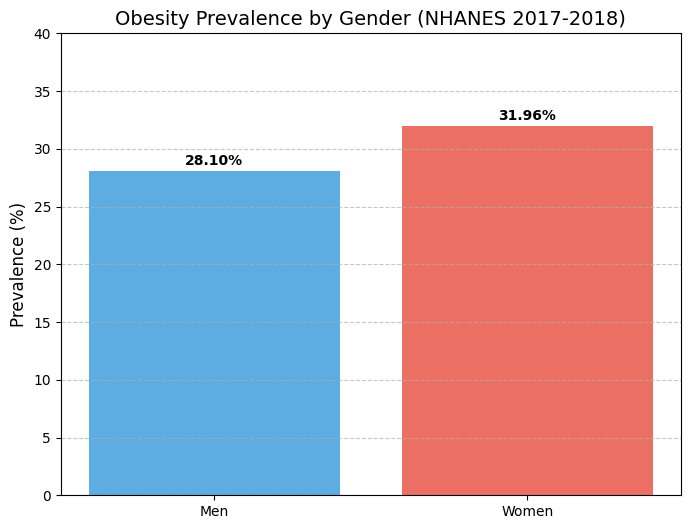

In [12]:
import matplotlib.pyplot as plt

# 1. Prepare data for plotting
categories = ['Men', 'Women']
values = [male_prev, female_prev]
colors = ['#3498db', '#e74c3c'] # Blue for Men, Red for Women

# 2. Create the Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=colors, alpha=0.8)

# 3. Add Labels and Title (Professional Formatting)
plt.title('Obesity Prevalence by Gender (NHANES 2017-2018)', fontsize=14)
plt.ylabel('Prevalence (%)', fontsize=12)
plt.ylim(0, 40) # Set limit a bit higher than max value for readability

# 4. Display the values on top of the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontweight='bold')

# 5. Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Distribution Analysis (Scatter Plot)**

To complement the prevalence data, we visualize the relationship between Age and BMI using a scatter plot. This visualization allows us to observe the distribution of individual data points across the lifespan and identify patterns relative to the clinical obesity threshold (BMI $\ge$ 30).

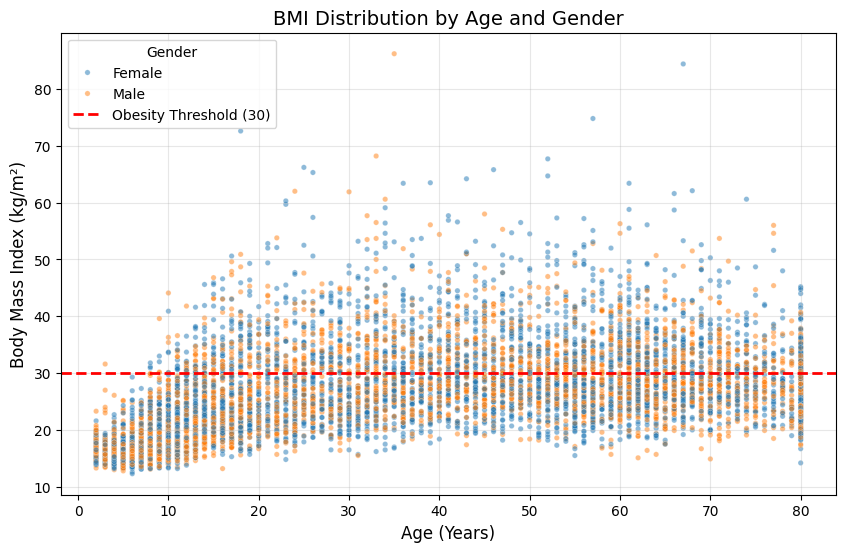

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# 1. Create the Scatter Plot
# x = Age, y = BMI, hue = Color by Gender
sns.scatterplot(data=df_clean, x='Age', y='BMI', hue='Gender', alpha=0.5, s=15)

# 2. Add the Obesity Threshold Line (BMI = 30)
plt.axhline(y=30, color='red', linestyle='--', linewidth=2, label='Obesity Threshold (30)')

# 3. Professional Formatting
plt.title('BMI Distribution by Age and Gender', fontsize=14)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Body Mass Index (kg/m²)', fontsize=12)
plt.legend(title='Gender', loc='upper left')
plt.grid(True, alpha=0.3)

plt.show()

**Study Conclusions**

The following summary outlines the key findings derived from the analytical processing of the NHANES 2017-2018 dataset.

**Executive Summary: Obesity Burden Assessment**

This cross-sectional analysis evaluated the prevalence of obesity within a sample of 8,005 individuals representing the U.S. civilian non-institutionalized population (NHANES 2017-2018 cycle).The overall crude prevalence of obesity (defined as BMI $\ge$ 30 kg/m²) was found to be 30.08%.Gender-stratified analysis revealed a disparity in the burden of disease:Females exhibited a higher prevalence rate of 31.96%.Males showed a comparatively lower prevalence rate of 28.10%.The visualization of BMI distribution suggests a positive correlation between age and BMI accumulation up to middle adulthood, with a substantial portion of the population exceeding the clinical threshold for obesity across all adult age groups.